# Craft a Story From a Dataset
10/21/22

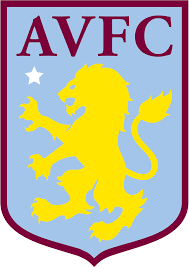

# Data Storytelling
We are big fans of the English Premier League team Aston Villa. However, they haven't been doing too hot this 2022-23 season. They have only won 2/11 games this season and are currently 17th/20th place (near relegation).

### Our question: 
Based on Aston Villa's average home goals and away goals so far, can we predict how well they will do this season?

### Current stats:
Currently Aston Villa's home goal average is 1.28/game, and their away goal average is 1.31/game.

# Kaggle Dataset

We have a Kaggle dataset of Premier League games 1992-2022: https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022. We will subset for Aston Villa (home and away). 

In [1]:
# first we'll import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# here's the Kaggle dataset
matches = pd.read_csv('eplmatches.csv')
matches.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [52]:
# let's subset for Aston Villa's home and away games
villans_home = matches.loc[(matches['Home']=='Aston Villa')]
villans_away = matches.loc[(matches['Away']=='Aston Villa')]

In [53]:
# we need a counter so we can take the average
villans_home['counter'] = 1
villans_away['counter'] = 1

<ipython-input-53-7a33adbac062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  villans_home['counter'] = 1
<ipython-input-53-7a33adbac062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  villans_away['counter'] = 1


In [54]:
# now let's combine home and away games into one dataframe
villans_yearly = pd.DataFrame()
villans_yearly['HomeGoals_avg'] = villans_home.groupby('Season_End_Year')['HomeGoals'].mean()
villans_yearly['AwayGoals_avg'] = villans_away.groupby('Season_End_Year')['AwayGoals'].mean()
villans_yearly['HomeGoals_total'] = villans_home.groupby('Season_End_Year')['HomeGoals'].sum()
villans_yearly['AwayGoals_total'] = villans_away.groupby('Season_End_Year')['AwayGoals'].sum()
villans_yearly['HomeWins'] = villans_home.loc[villans_home['FTR']=='H'].groupby('Season_End_Year')['counter'].sum()
villans_yearly['AwayWins'] = villans_away.loc[villans_away['FTR']=='A'].groupby('Season_End_Year')['counter'].sum()
villans_yearly['TotalWins'] = villans_yearly['HomeWins'] + villans_yearly['AwayWins']

# Aston Villa by season, 1992-2022

Now that we've subsetted and engineered our features, we have some useful info on Aston Villa's stats by season.

In [55]:
# here's our dataframe
villans_yearly

,HomeGoals_avg,AwayGoals_avg,HomeGoals_total,AwayGoals_total,HomeWins,AwayWins,TotalWins
Season_End_Year,,,,,,,
1993,1.714286,1.000000,36,21,13,8,21
1994,1.095238,1.095238,23,23,8,7,15
1995,1.285714,1.142857,27,24,6,5,11
1996,1.684211,1.052632,32,20,11,7,18
1997,1.421053,1.052632,27,20,11,6,17
1998,1.368421,1.210526,26,23,9,8,17
1999,1.736842,0.947368,33,18,10,5,15
2000,1.210526,1.210526,23,23,8,7,15
2001,1.421053,1.000000,27,19,8,5,13


# Data Visualizations

Let's visualize our data. Over 1992-2022, when we look at home and away goals, both averages and total, and home and away wins: do these track with total wins over the season?

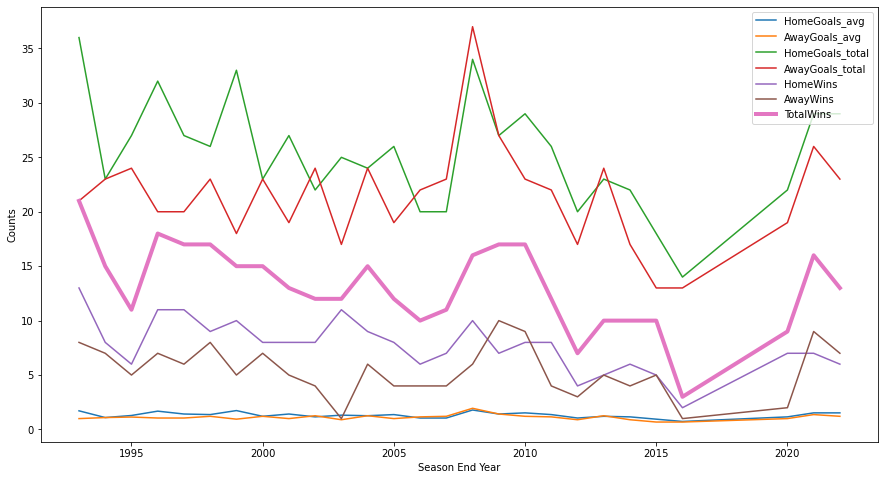

In [95]:
plt.figure(figsize=(15,8))
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='HomeGoals_avg', label='HomeGoals_avg')
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='AwayGoals_avg', label='AwayGoals_avg')
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='HomeGoals_total', label='HomeGoals_total')
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='AwayGoals_total', label='AwayGoals_total')
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='HomeWins', label='HomeWins')
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='AwayWins', label='AwayWins')
sns.lineplot(data=villans_yearly, x='Season_End_Year', y='TotalWins', label='TotalWins', linewidth=4)
plt.legend()
plt.xlabel('Season End Year')
plt.ylabel('Counts')
plt.show()

It certainly seems like TotalWins tracks well with the other features!

## Scaled Data

Let's try another visualization: if we scale our data, we might be able to see the trends better.

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
villans_scaled_array = scaler.fit_transform(villans_yearly)
villans_scaled_df = pd.DataFrame(villans_scaled_array, index=villans_yearly.index,
              columns=villans_yearly.columns)
villans_scaled_df

,HomeGoals_avg,AwayGoals_avg,HomeGoals_total,AwayGoals_total,HomeWins,AwayWins,TotalWins
Season_End_Year,,,,,,,
1993,0.928571,0.250000,1.000000,0.333333,1.000000,0.777778,1.000000
1994,0.340476,0.325397,0.409091,0.416667,0.545455,0.666667,0.666667
1995,0.521429,0.363095,0.590909,0.458333,0.363636,0.444444,0.444444
1996,0.900000,0.291667,0.818182,0.291667,0.818182,0.666667,0.833333
1997,0.650000,0.291667,0.590909,0.291667,0.818182,0.555556,0.777778
1998,0.600000,0.416667,0.545455,0.416667,0.636364,0.777778,0.777778
1999,0.950000,0.208333,0.863636,0.208333,0.727273,0.444444,0.666667
2000,0.450000,0.416667,0.409091,0.416667,0.545455,0.666667,0.666667
2001,0.650000,0.250000,0.590909,0.250000,0.545455,0.444444,0.555556


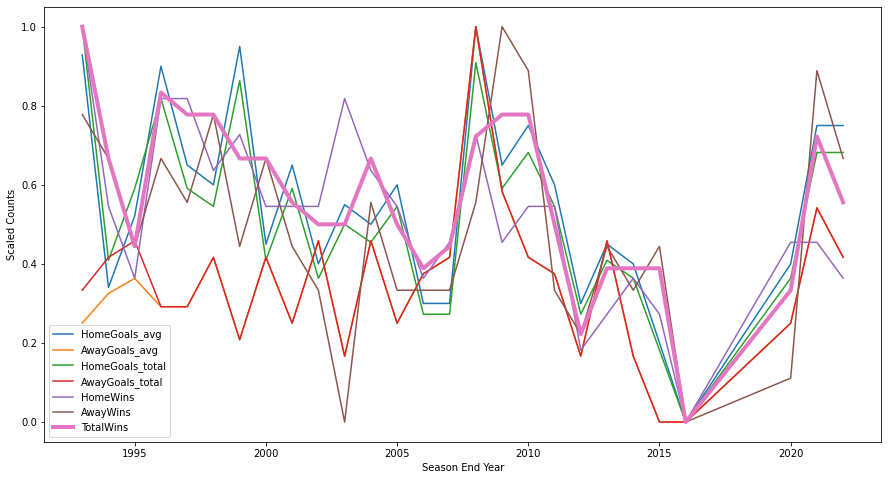

In [94]:
plt.figure(figsize=(15,8))
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='HomeGoals_avg', label='HomeGoals_avg')
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='AwayGoals_avg', label='AwayGoals_avg')
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='HomeGoals_total', label='HomeGoals_total')
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='AwayGoals_total', label='AwayGoals_total')
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='HomeWins', label='HomeWins')
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='AwayWins', label='AwayWins')
sns.lineplot(data=villans_scaled_df, x='Season_End_Year', y='TotalWins', label='TotalWins', linewidth=4, markers='o')
plt.legend()
plt.xlabel('Season End Year')
plt.ylabel('Scaled Counts')
plt.show()

# Conclusions

Based on historical data, it certainly seems like total wins over the season follows the other features. In particular it tracks closely with home data: home goals (averages and total) and home wins. 

For 2022-23, we have an average home goal rate of 1.28. Based on that, we might expect to win about 11 games (corresponding to data from 1995), or perhaps as many as 15 (corresponding to data from 2004). That's a pretty big variation in result! We will have to wait and see.